In [246]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

# Algorithmes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx
/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx


In [247]:
train = pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [248]:
test = pd.read_excel('/kaggle/input/flight-price-prediction-dataset/Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [249]:
if(train.shape != test.shape):
    print("everthing good for shape")
else:
    print("check shape")

everthing good for shape


In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [251]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [252]:
train.dropna(inplace = True)

In [253]:
test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [254]:
train.duplicated().sum()

220

In [255]:
train.drop_duplicates(inplace=True)

In [256]:
test.duplicated().sum()

26

In [257]:
test.drop_duplicates(inplace=True)

In [258]:
df = pd.concat([train, test], ignore_index=True)
print(df.head())
print(df.tail())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0  
                 Airline Date_of_Journey   Source Destination  \
13102          Air Ind

In [259]:
df.Additional_Info.value_counts()

Additional_Info
No info                         10308
In-flight meal not included      2366
No check-in baggage included      394
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

In [260]:
total_stops_mapping = {'non-stop':0,
                       '1 stop': 1,
                        '2 stops':2,
                        '3 stops':3,
                        '4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(total_stops_mapping)
df['Total_Stops'].value_counts()

Total_Stops
1    7052
0    4321
2    1678
3      54
4       2
Name: count, dtype: int64

In [261]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [262]:
df['month']=df['Date_of_Journey'].dt.month.astype(str)
df['day']=df['Date_of_Journey'].dt.day.astype(str)


In [263]:
df['Duration_hour']=df['Duration'].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split('h').str[1].replace(['m'],'')
#df['Duration_min']=df['Duration_min'].apply(lambda i:i[:-1]) it is not work
df['Duration_min']=df['Duration_min'].str[:-1]

In [264]:
df[df['Duration_hour'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_min
6397,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327.0,3,6,5m,NaN
13096,Air India,2019-03-12,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,NaN,3,12,5m,NaN


In [265]:
df.drop(df[df['Duration_hour'] == '5m'].index, inplace = True)

In [266]:
df['Duration_hour'] = df['Duration_hour'].astype(int)

In [267]:
df['Duration_min'].replace('',np.nan,inplace=True)
df['Duration_min'].fillna(0,inplace=True)
df['Duration_min']=df['Duration_min'].astype(int)

In [268]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,3,24,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,5,1,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,6,9,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,5,12,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,3,1,4,45


In [269]:
def convert_to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
df['Duration_hour'] = df['Duration_hour'].apply(convert_to_minutes)
df['Duration_min'] = df['Duration_hour']+df['Duration_min']
df.drop(columns = ['Duration_hour', 'Duration'], inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,day,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,0,No info,3897.0,3,24,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2,No info,7662.0,5,1,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2,No info,13882.0,6,9,420
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1,No info,6218.0,5,12,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1,No info,13302.0,3,1,285


In [270]:
print("Last Journey Date: ", df['Date_of_Journey'].max())
print("First Journey Date: ", df['Date_of_Journey'].min())

Last Journey Date:  2019-06-27 00:00:00
First Journey Date:  2019-03-01 00:00:00


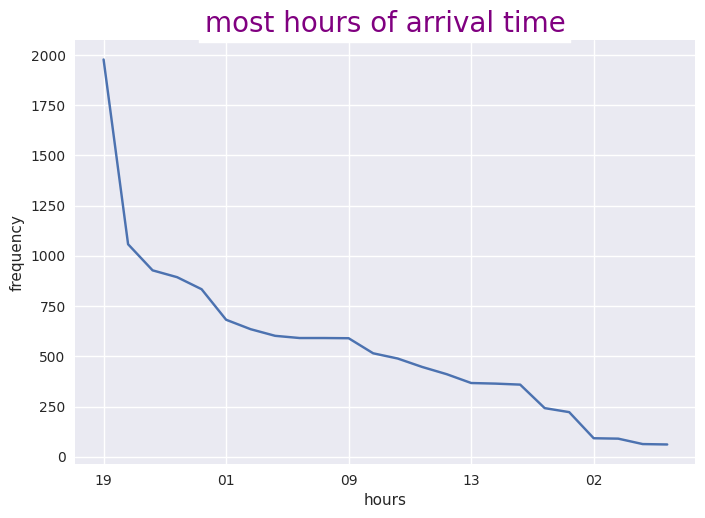

In [271]:
df['Arrival_Time'].str[:2].value_counts().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of arrival time",
          fontsize='20',
          backgroundcolor='white',
          color='purple');

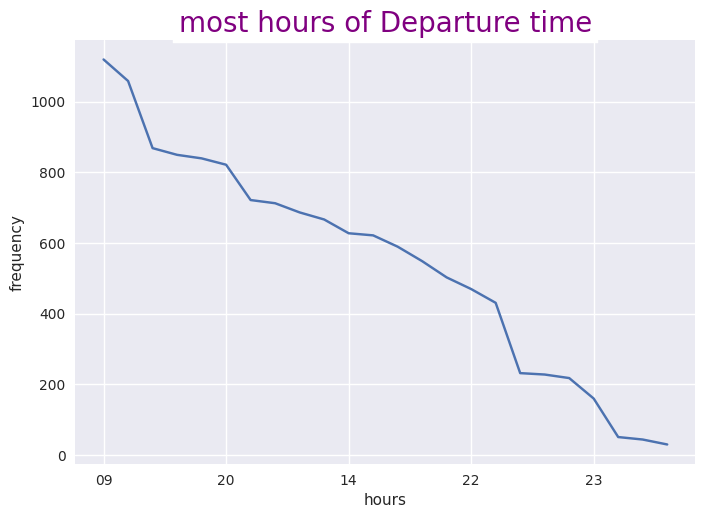

In [272]:
df['Dep_Time'].str[:2].value_counts().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of Departure time",
          fontsize='20',
          backgroundcolor='white',
          color='purple');

<Axes: xlabel='Date_of_Journey', ylabel='Price'>

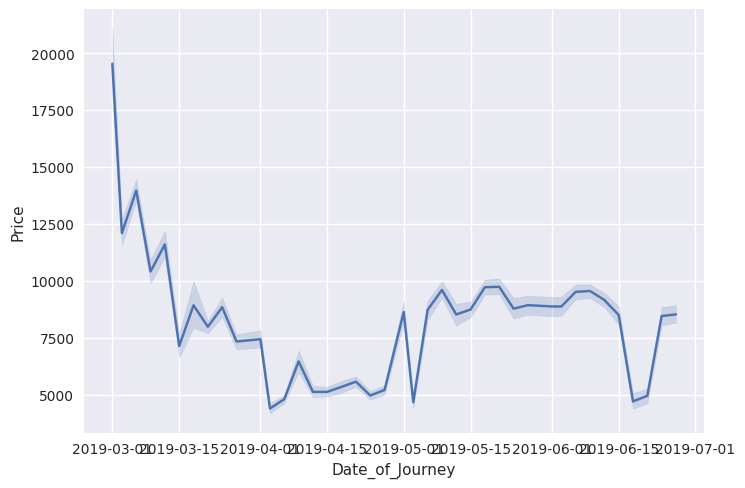

In [273]:
sns.lineplot(x='Date_of_Journey', y = 'Price', data = df[df['Price']!=np.nan], palette='crest')


In [274]:
# df['Duration_min'].value_counts()

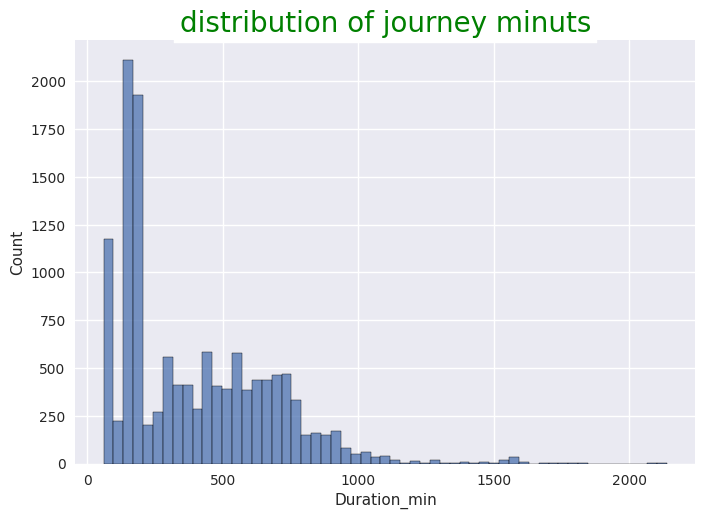

In [275]:
sns.histplot(x='Duration_min', data = df, palette='crest')
plt.title("distribution of journey minuts",
          fontsize='20',
          backgroundcolor='white',
          color='green');

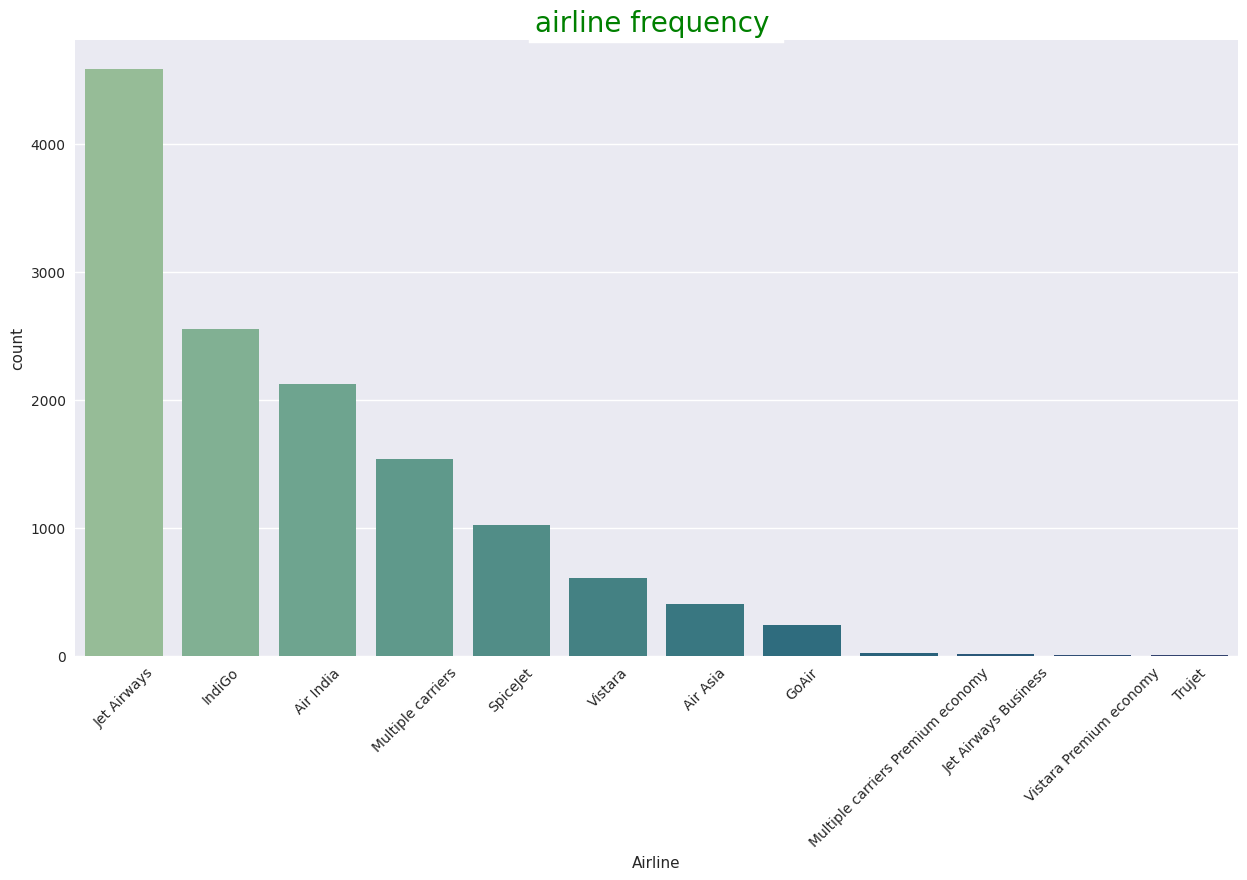

In [276]:
plt.figure(figsize = (15,8))
chart = sns.countplot(x = 'Airline', data = df, palette='crest', order = df['Airline'].value_counts().index)
plt.title("airline frequency ",
          fontsize='20',
          backgroundcolor='white',
          color='green')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45);

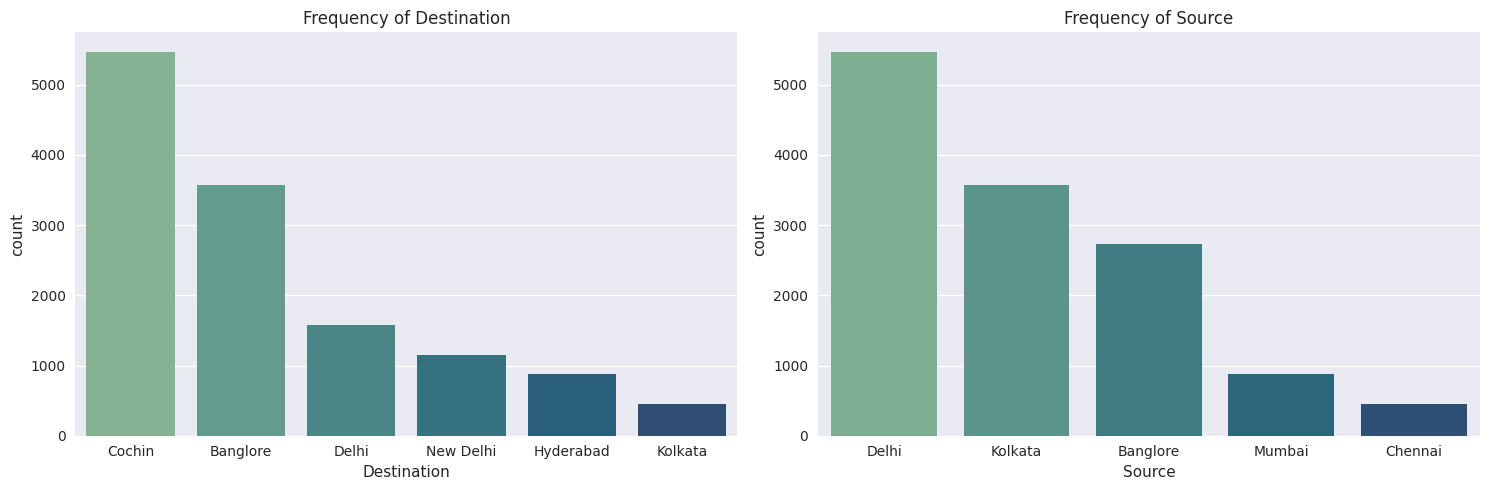

In [277]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
sns.countplot(x='Destination', data=df, palette='crest', order=df['Destination'].value_counts().index, ax=ax[0]).set(title='Frequency of Destination')
sns.countplot(x='Source', data=df, palette='crest', order=df['Source'].value_counts().index, ax=ax[1]).set(title='Frequency of Source')
plt.tight_layout()

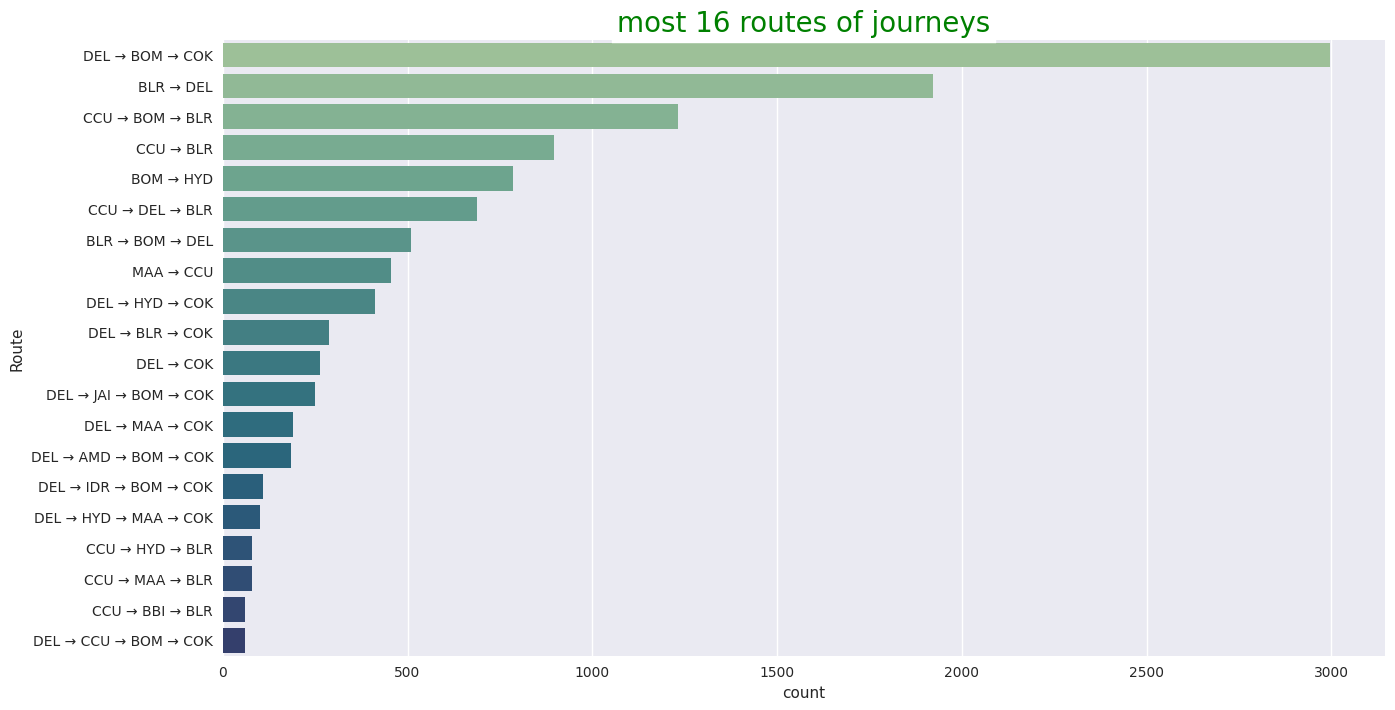

In [278]:
plt.figure(figsize=(15,8))
chart = sns.countplot(y = 'Route', data = df, palette='crest', order = df['Route'].value_counts()[:20].index)
plt.title("most 16 routes of journeys",
          fontsize='20',
          backgroundcolor='white',
          color='green');


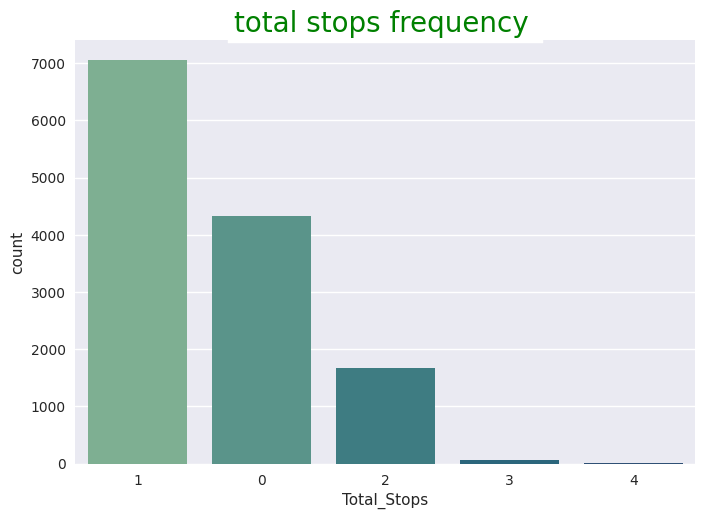

In [279]:
sns.countplot(x='Total_Stops', data = df, palette='crest', order = df['Total_Stops'].value_counts().index)
plt.title("total stops frequency ",
          fontsize='20',
          backgroundcolor='white',
          color='green');

In [280]:
# train['Route'].value_counts()

In [281]:
df['Len_Route'] = df['Route'].apply(lambda i:len(i))
df.drop(columns = ['Route'], inplace=True)

In [282]:
df.drop(columns=['Date_of_Journey', 'Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [283]:
df['Airline'].value_counts()

Airline
Jet Airways                          4586
IndiGo                               2552
Air India                            2124
Multiple carriers                    1539
SpiceJet                             1023
Vistara                               607
Air Asia                              405
GoAir                                 239
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

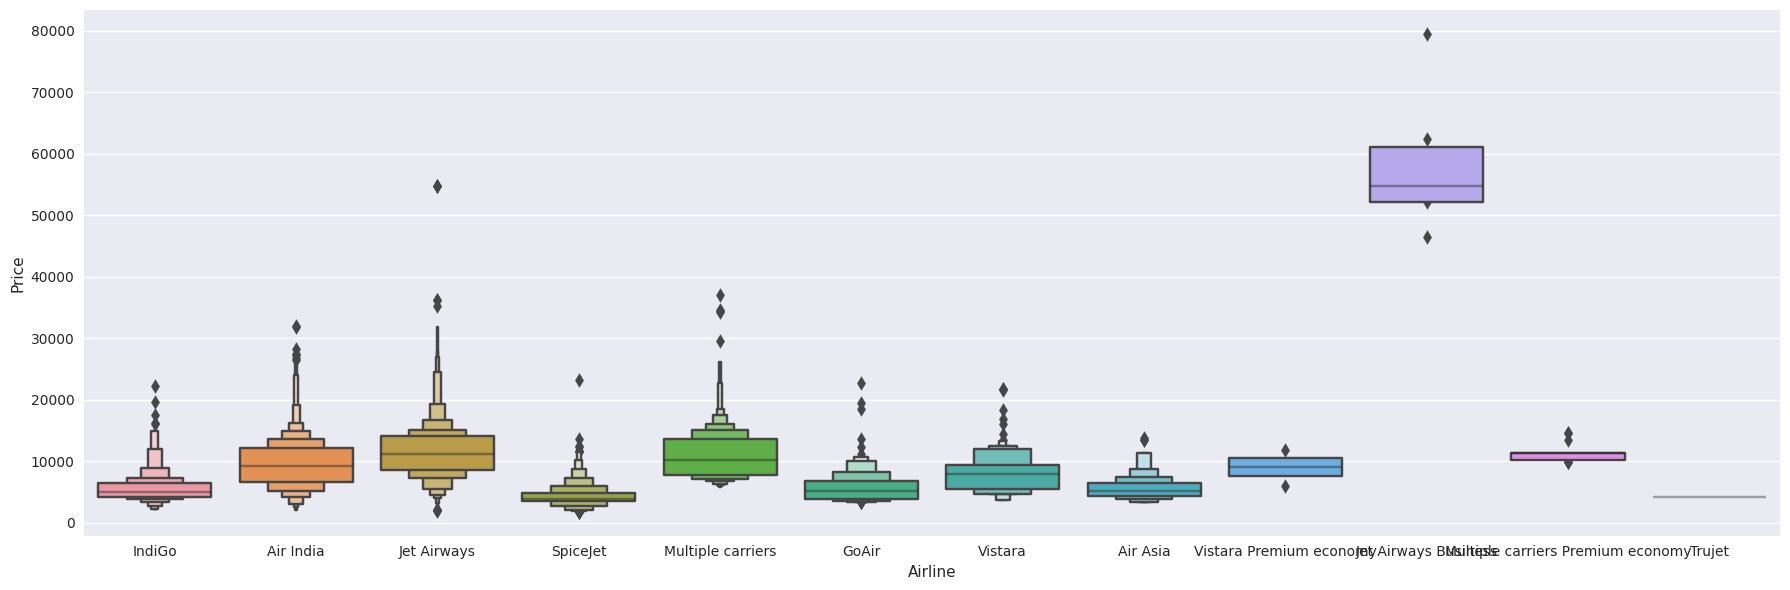

In [284]:
sns.catplot(y='Price', x='Airline', data = df, kind = 'boxen', height = 6, aspect =3)
plt.show()

In [285]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month,day,Duration_min,Len_Route
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,3,24,170,9
1,Air India,Kolkata,Banglore,2,No info,7662.0,5,1,445,21
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,6,9,420,21
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,5,12,325,15
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,3,1,285,15


In [286]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [287]:
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [288]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [289]:
df.drop([ "Additional_Info"], axis = 1, inplace = True)

In [290]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,month,day,Duration_min,Len_Route
0,IndiGo,Banglore,New Delhi,0,3897.0,3,24,170,9
1,Air India,Kolkata,Banglore,2,7662.0,5,1,445,21
2,Jet Airways,Delhi,Cochin,2,13882.0,6,9,420,21
3,IndiGo,Kolkata,Banglore,1,6218.0,5,12,325,15
4,IndiGo,Banglore,New Delhi,1,13302.0,3,1,285,15


In [291]:
df = pd.concat([df, Airline, Source, Destination], axis =1)

In [292]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [293]:
df.head()

,Total_Stops,Price,month,day,Duration_min,Len_Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,3,24,170,9,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662.0,5,1,445,21,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882.0,6,9,420,21,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218.0,5,12,325,15,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302.0,3,1,285,15,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [294]:
data = df[~(df['Price'].isna())]
data.tail()

,Total_Stops,Price,month,day,Duration_min,Len_Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10457,0,4107.0,4,9,150,9,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10458,0,4145.0,4,27,155,9,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10459,0,7229.0,4,27,180,9,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10460,0,12648.0,3,1,160,9,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
10461,2,11753.0,5,9,500,21,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


In [295]:
test_data = df[df['Price'].isna()]
test_data = test_data.drop(columns=['Price'])
test_data.head()

,Total_Stops,month,day,Duration_min,Len_Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10462,1,6,6,655,15,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10463,1,5,12,240,15,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10464,1,5,21,705,15,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10465,1,5,21,60,15,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10466,0,6,24,170,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [296]:
X = data.drop(columns = ['Price'])
y = data['Price']
X.shape, y.shape

((10461, 25), (10461,))

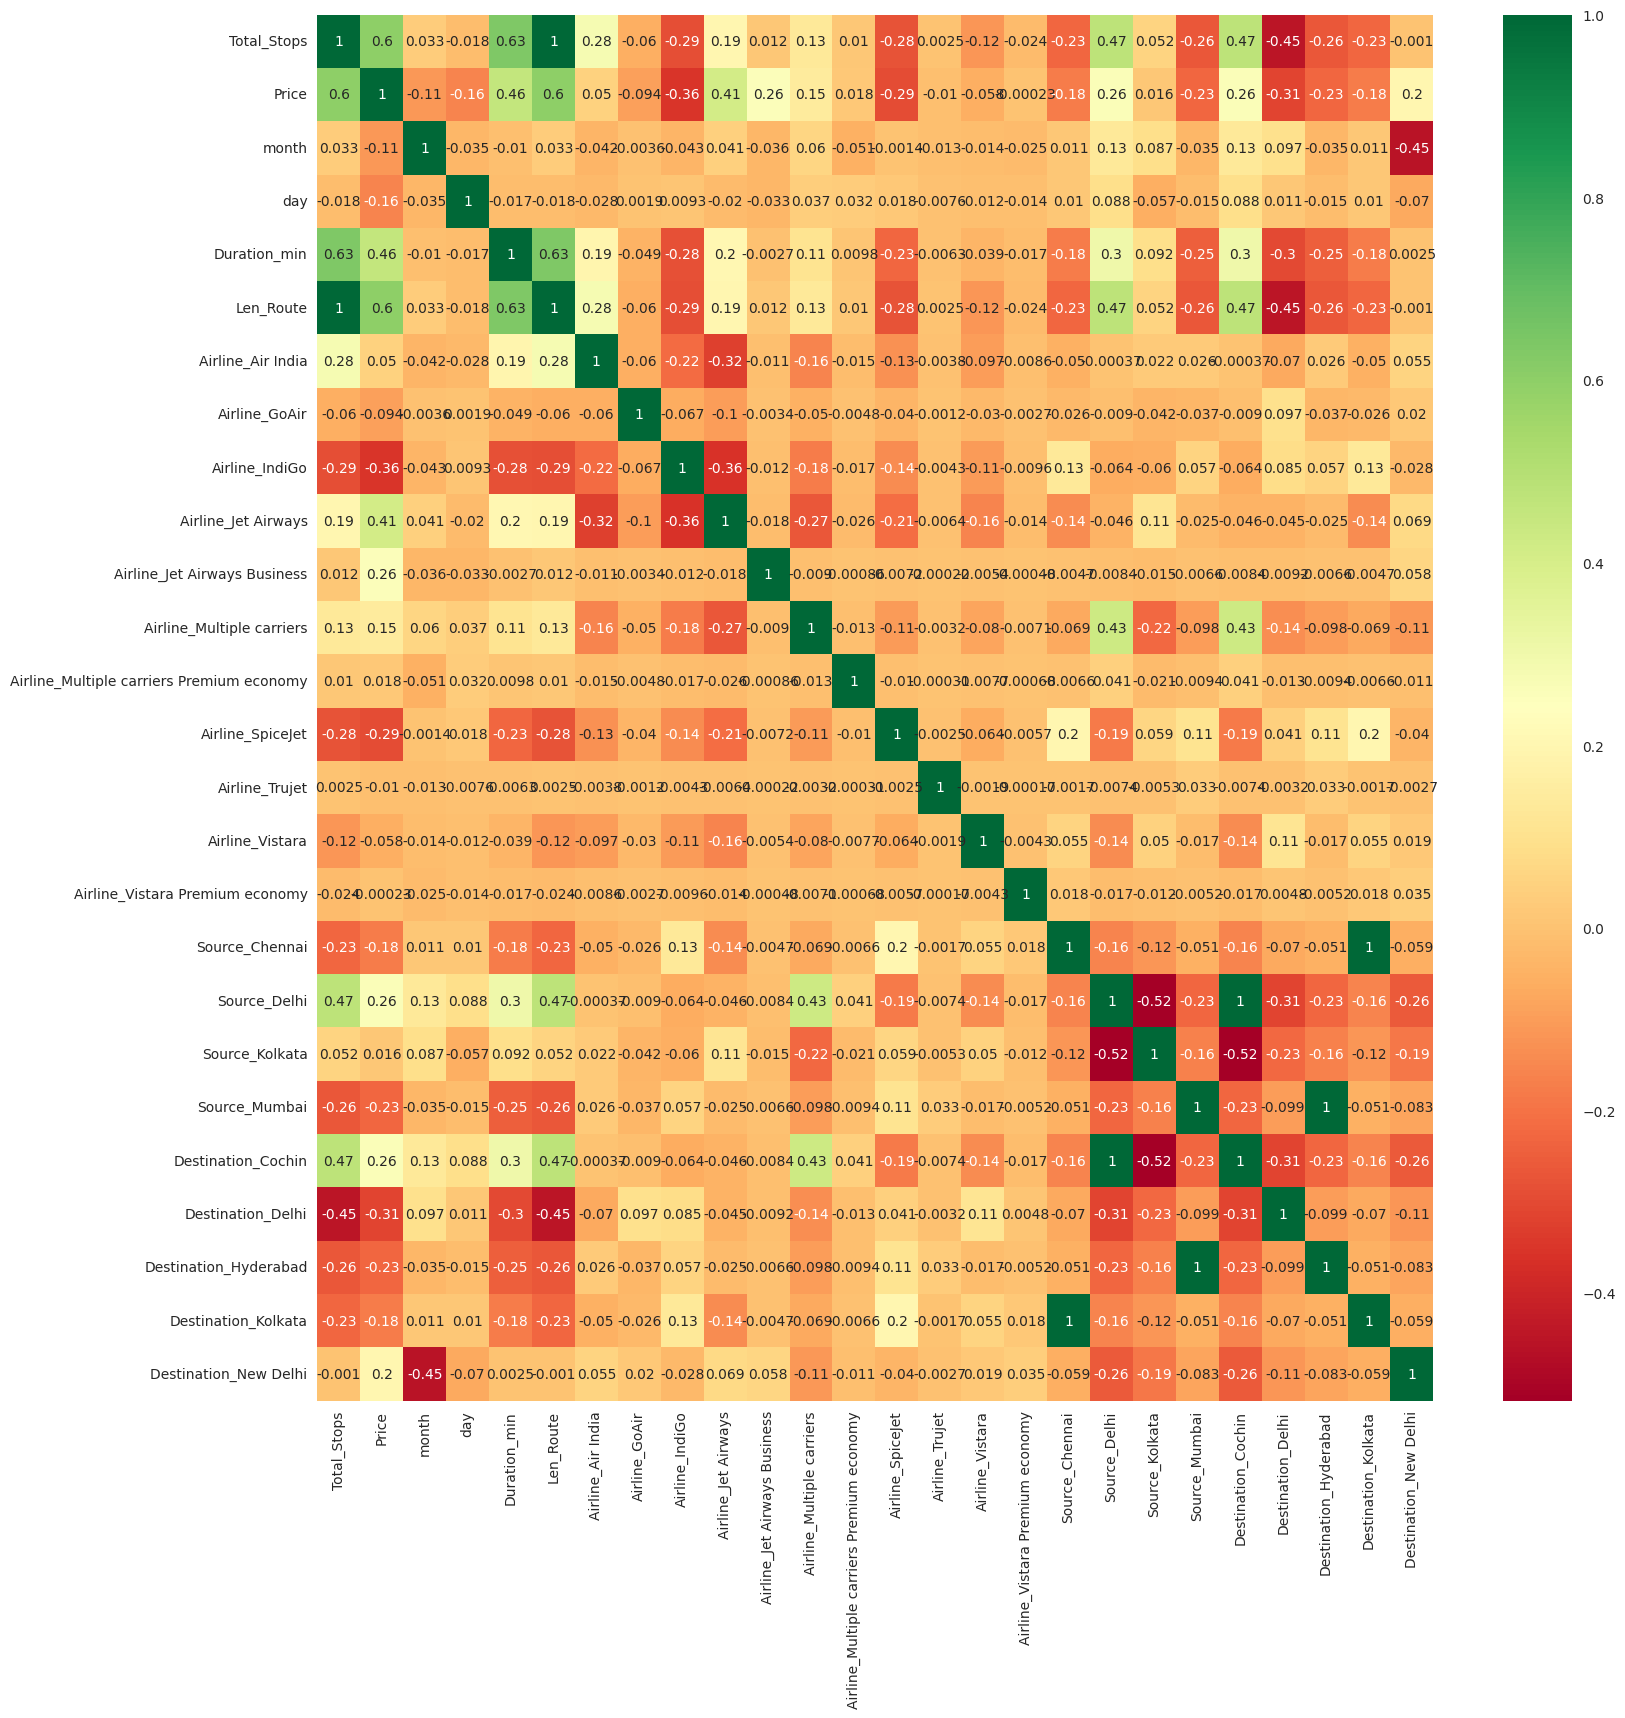

In [297]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24, shuffle =True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7322, 25), (3139, 25), (7322,), (3139,))

In [299]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

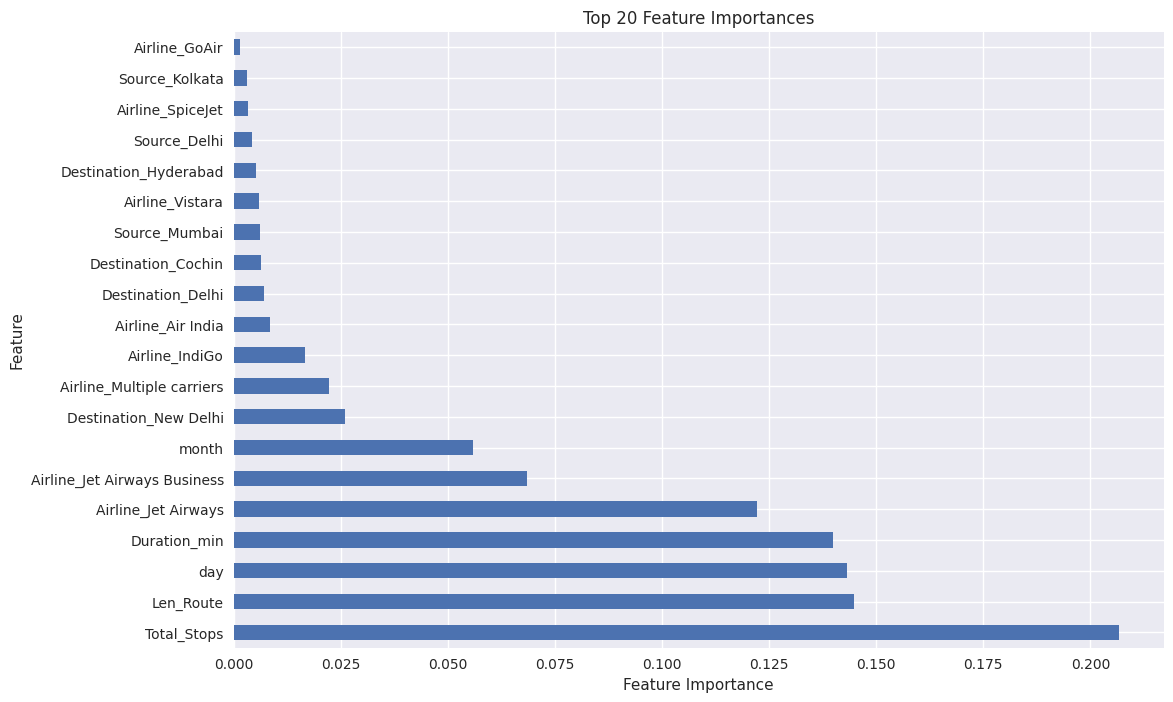

In [300]:
plt.figure(figsize=(12, 8))
top_features = feature_importance.nlargest(20)  # Get the top 20 features

# Plot the top features in a horizontal bar chart
top_features.plot(kind='barh')

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()

In [301]:
from sklearn.model_selection import RandomizedSearchCV
CV=[]
train_scores = []
test_scores = []

def pred_model(model):
    model.fit(X_train, y_train)
    train_model_score = model.score(X_train, y_train)
    train_scores.append(round(train_model_score,2))
    y_pred_train = model.predict(X_train)
    
    test_model_score = model.score(X_test,y_test)
    test_scores.append(round(test_model_score,2))
    y_pred_test=model.predict(X_test)
    
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train score :",round(train_model_score,2))
    print("Test score :",round(test_model_score,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean absolute error for train :",mean_absolute_error(y_train,y_pred_train))
    print("Median absolute error for train :",median_absolute_error(y_train,y_pred_train))
    print("Mean absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    print("Median absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train[:100]-y_pred_train[:100]),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test[:100], y = y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()
    

Train score : 0.63
Test score : 0.6
Train CV scores : [0.61600507 0.65626035 0.68032934 0.60926625 0.56923353]
Train CV mean : 0.63
Mean absolute error for train : 1934.6180989879686
Median absolute error for train : 1393.6932609715532
Mean absolute error for test : 2002.8690433906118
Median absolute error for test : 2002.8690433906118


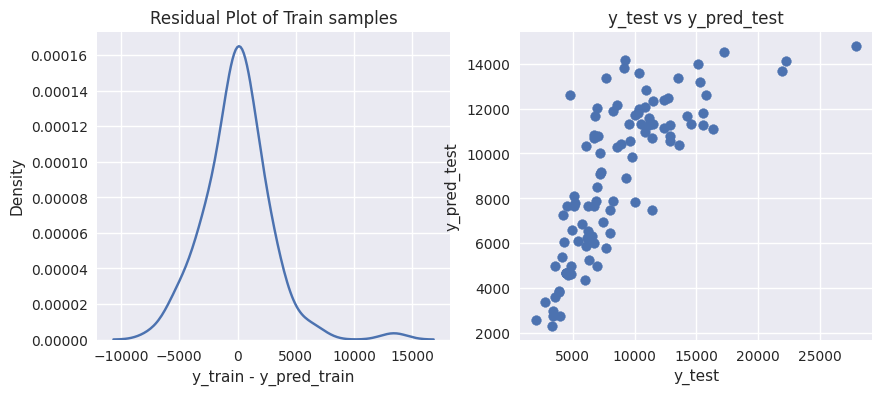

In [302]:
lr=LinearRegression()
pred_model(lr)

Train score : 0.34
Test score : 0.32
Train CV scores : [0.37711752 0.29879116 0.28113177 0.37569476 0.34213768]
Train CV mean : 0.33
Mean absolute error for train : 2456.095025591813
Median absolute error for train : 1774.9619577040535
Mean absolute error for test : 2563.521137032112
Median absolute error for test : 2563.521137032112


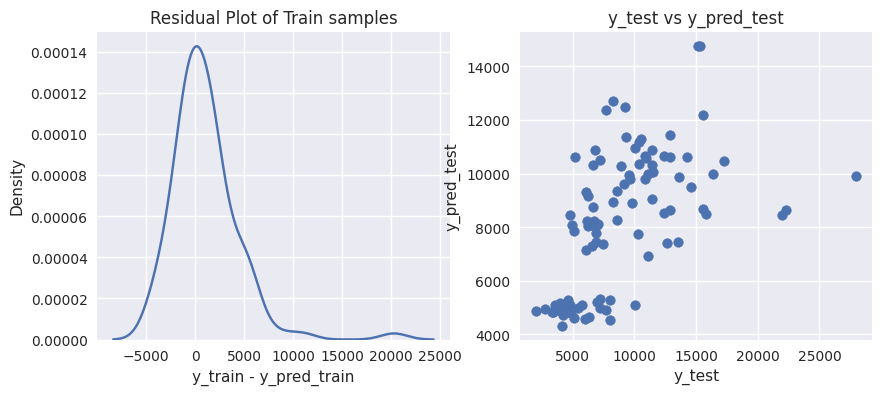

In [303]:

SGDR = SGDRegressor()
dic={"penalty":['l2','l1', 'elasticnet'],
     "loss":['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
    }
SGDR_rs = GridSearchCV(estimator = SGDR, param_grid = dic)
pred_model(SGDR_rs)

Train score : 0.93
Test score : 0.75
Train CV scores : [0.73933897 0.79782843 0.78245828 0.78119647 0.69184146]
Train CV mean : 0.76
Mean absolute error for train : 701.8875025402815
Median absolute error for train : 353.9227202380948
Mean absolute error for test : 1451.1633257587446
Median absolute error for test : 1451.1633257587446


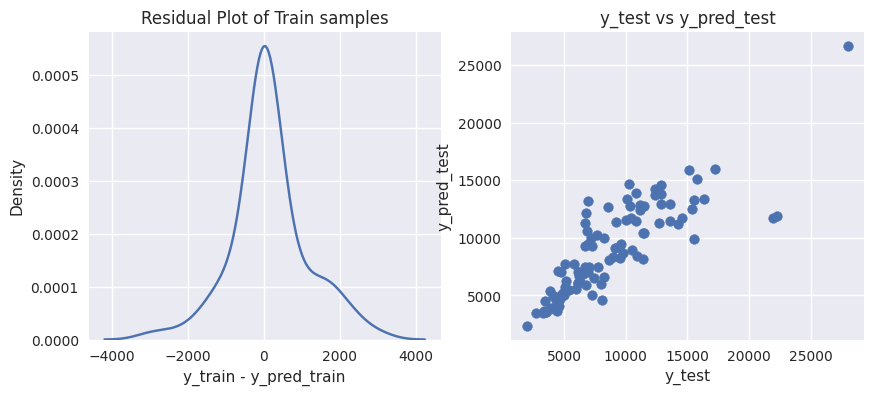

In [304]:
RF = RandomForestRegressor()

pred_model(RF)

Train score : 0.29
Test score : 0.29
Train CV scores : [0.33904157 0.17287296 0.25919733 0.18748367 0.29545744]
Train CV mean : 0.25
Mean absolute error for train : 2835.7967679672875
Median absolute error for train : 2407.7697293518104
Mean absolute error for test : 2904.1354791145236
Median absolute error for test : 2904.1354791145236


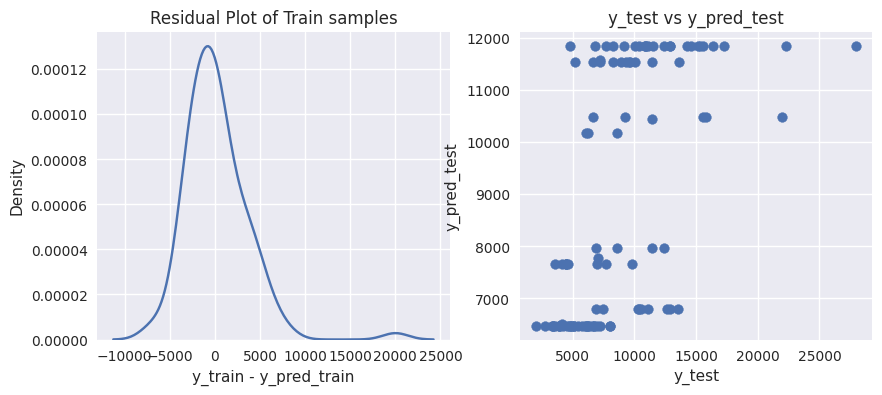

In [305]:
MLPR=MLPRegressor(activation='logistic',solver='lbfgs')
pred_model(MLPR)

In [314]:
# Convert 'month' and 'day' to categorical
from xgboost import XGBRegressor, DMatrix
X_train['month'] = X_train['month'].astype('category')
X_train['day'] = X_train['day'].astype('category')

# Map the categorical values to integers
cat_columns = ['month', 'day']
X_train[cat_columns] = X_train[cat_columns].apply(lambda x: x.cat.codes)

# Initialize the XGBRegressor
XGBR = XGBRegressor()

# Train the XGBoost model
XGBR.fit(X_train, y_train)  # Corrected line, using X_train and y_train

# Predictions
y_pred_train = XGBR.predict(X_train)

# Evaluate the model
train_score = XGBR.score(X_train, y_train)

print("Train score:", train_score)

X_test['month'] = X_test['month'].astype('category')
X_test['day'] = X_test['day'].astype('category')

# Map the categorical values to integers for test data
X_test[cat_columns] = X_test[cat_columns].apply(lambda x: x.cat.codes)

# Predictions on the test set
y_pred_test = XGBR.predict(X_test)

# Evaluate the model on the test set
test_score = XGBR.score(X_test, y_test)

print("Test score:", test_score)

Train score: 0.8962405941631536
Test score: 0.7998586760136921


In [318]:
# Ensure the arrays have the same length
min_length = min(len(train_scores), len(test_scores), len(CV))
train_scores = train_scores[:min_length]
test_scores = test_scores[:min_length]
CV = CV[:min_length]

# Create the DataFrame
results = pd.DataFrame({
    'Model': Technique[:min_length],
    'Accuracy(Train)': train_scores,
    'Accuracy(Test)': test_scores,
    'CV score mean(Train)': CV
})

# Display the results
display(results)


,Model,Accuracy(Train),Accuracy(Test),CV score mean(Train)
0,LinearRegression,0.63,0.60,0.63
1,SGDRegressor,0.34,0.32,0.33
2,RandomForestRegressor,0.93,0.75,0.76
3,MLPRegressor,0.29,0.29,0.25


In [319]:
test_data.head()

,Total_Stops,month,day,Duration_min,Len_Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10462,1,6,6,655,15,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10463,1,5,12,240,15,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10464,1,5,21,705,15,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10465,1,5,21,60,15,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
10466,0,6,24,170,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [322]:
Prdicted_Price=RF.predict(test_data)
Prdicted_Price[:5]

array([10893.404     ,  4226.        , 14435.8145    , 12893.63283333,
        4168.31      ])

In [323]:
test_data['Prdicted_Price']=Prdicted_Price

In [324]:
test_data.head()

,Total_Stops,month,day,Duration_min,Len_Route,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Prdicted_Price
10462,1,6,6,655,15,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,10893.404000
10463,1,5,12,240,15,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,4226.000000
10464,1,5,21,705,15,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,14435.814500
10465,1,5,21,60,15,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,12893.632833
10466,0,6,24,170,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,4168.310000


13

Info Tech, PU
